In [11]:
with open('good_names.txt') as f:
    name_dataset = f.readlines()

In [4]:
def name_sanity_check(names):
    good_names = []
    for name in names:
        try:
            new_name = ''
            for letter in name:
                if letter.isalpha() or letter == '’' or letter == '\'':
                    new_name += letter
            if len(new_name) <= 1:
                continue
            if any([i in new_name for i in ['t', 'o', 'm', 'k']]):
                continue
            new_name = new_name.lower()
            new_name = new_name.replace('\'', '’').replace('ы', 'и').replace('ъ', 'ь').replace('i', 'і')
            if new_name in good_names:
                continue
            good_names.append(new_name)
        except:
            continue
    return good_names

In [13]:
name_dataset = name_sanity_check(name_dataset)

In [4]:
cosac_new = name_sanity_check(cosac_names)
regular_new = name_sanity_check(regular_names)

In [5]:
additional_data = name_sanity_check(additional_data)

In [6]:
name_dataset = cosac_new + regular_new

In [7]:
# save nice dataset

with open('good_names.txt', 'w') as f:
    for name in name_dataset:
        f.write(f"{name}\n")

In [8]:
dataset = name_dataset + additional_data

In [14]:
len(name_dataset)

3937

In [34]:
import random
print(random.sample(name_dataset, 10))

['бонь', 'владилен', 'євстрат', 'добромир', 'вендеслав', 'новослав', 'честирад', 'непутько', 'мстиша', 'вогнедара']


In [35]:
alphabet = ['.'] + sorted(list(set(''.join(name_dataset))))

In [36]:
abc_size = len(alphabet)

In [37]:
print(' '.join(alphabet))

. а б в г д е ж з и й к л м н о п р с т у ф х ц ч ш щ ь ю я є і ї ґ ’


In [38]:
abc_size

35

In [39]:
stoi = {s: i for i, s in enumerate(alphabet)}
itos = {v: k for k, v in stoi.items()}

In [40]:
stoi['.']

0

In [41]:
import torch

In [42]:
N = torch.zeros((abc_size, abc_size), dtype=torch.int32)

In [73]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [79]:
log_likelihood = 0.0
n = 0
for name in ["богдан"]:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1, idx2]
        log_likelihood += torch.log(prob)
        n += 1
        
nll = -log_likelihood
nll /= n
print(f"{nll=}")

nll=tensor(2.1887)


In [88]:
print(N[0, 3].grad)

None


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

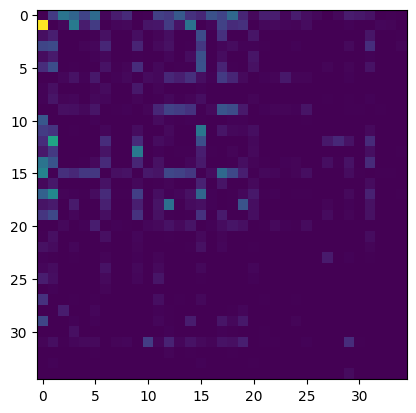

In [51]:
plt.imshow(N)

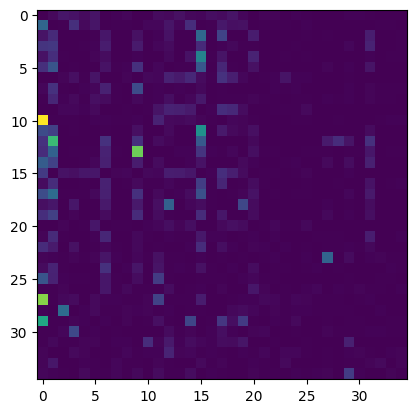

In [305]:
plt.imshow(W.exp().detach().numpy())

In [303]:
xs, ys = [], []

for name in name_dataset:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        
        xs.append(idx1)
        ys.append(idx2)

xs, ys = torch.tensor(xs), torch.tensor(ys)
num = xs.nelement()

W = torch.randn((abc_size, abc_size), requires_grad=True)

In [304]:
for _ in range(100):
    # forward
    xenc = F.one_hot(xs, num_classes=abc_size).float()
    logits = (xenc @ W)
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    
    # backward
    W.grad = None
    loss.backward()
    
    # update
    W.data += -50* W.grad
    
    print(loss)

tensor(3.9690, grad_fn=<NegBackward0>)
tensor(3.6364, grad_fn=<NegBackward0>)
tensor(3.4017, grad_fn=<NegBackward0>)
tensor(3.2343, grad_fn=<NegBackward0>)
tensor(3.1078, grad_fn=<NegBackward0>)
tensor(3.0114, grad_fn=<NegBackward0>)
tensor(2.9371, grad_fn=<NegBackward0>)
tensor(2.8793, grad_fn=<NegBackward0>)
tensor(2.8336, grad_fn=<NegBackward0>)
tensor(2.7968, grad_fn=<NegBackward0>)
tensor(2.7663, grad_fn=<NegBackward0>)
tensor(2.7404, grad_fn=<NegBackward0>)
tensor(2.7182, grad_fn=<NegBackward0>)
tensor(2.6987, grad_fn=<NegBackward0>)
tensor(2.6815, grad_fn=<NegBackward0>)
tensor(2.6662, grad_fn=<NegBackward0>)
tensor(2.6524, grad_fn=<NegBackward0>)
tensor(2.6399, grad_fn=<NegBackward0>)
tensor(2.6285, grad_fn=<NegBackward0>)
tensor(2.6181, grad_fn=<NegBackward0>)
tensor(2.6086, grad_fn=<NegBackward0>)
tensor(2.5998, grad_fn=<NegBackward0>)
tensor(2.5917, grad_fn=<NegBackward0>)
tensor(2.5842, grad_fn=<NegBackward0>)
tensor(2.5772, grad_fn=<NegBackward0>)
tensor(2.5707, grad_fn=<N